In [1]:
from PIL import Image, ImageDraw, ImageFont
import numpy as np 
import pandas as pd
import cv2 
from matplotlib import pyplot as plt 
from pylab import imread
from skimage.color import rgb2gray
import math

In [2]:
def imshows(ImageData, LabelData, rows, cols, gridType = False):
  # Convert ImageData and LabelData to List
  from matplotlib import pyplot as plt
  ImageArray = list(ImageData)
  LabelArray = list(LabelData)
  if(rows == 1 & cols == 1):
    fig = plt.figure(figsize=(20,20))
  else:
    fig = plt.figure(figsize=(cols*8,rows*5))
        
  for i in range(1, cols * rows + 1):
      fig.add_subplot(rows, cols, i)
      image = ImageArray[i - 1]
      # If the channel number is less than 3, we display as grayscale image
      # otherwise, we display as color image
      if (len(image.shape) < 3):
          plt.imshow(image, plt.cm.gray)
          plt.grid(gridType)
      else:
          plt.imshow(image)
          plt.grid(gridType)
      plt.title(LabelArray[i - 1])
  plt.show()

def ShowThreeImages(IM1, IM2, IM3):
    imshows([IM1, IM2, IM3], ["Image 1","Image 2", "Image 3"], 1, 3)
def ShowTwoImages(IM1, IM2):
    imshows([IM1, IM2], ["Image 1","Image 2"], 1, 2)
def ShowOneImage(IM):
    imshows([IM], ["Image"], 1, 1)
def ShowListImages(listImage, row, col):
    listCaption = []
    for i in range(len(listImage)):
        listCaption.append(str(i))
    imshows(listImage,listCaption,row,col)

fix from here

In [4]:
# Đọc ảnh
image = cv2.imread("special.jpg", cv2.IMREAD_UNCHANGED)
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# Lấy kích thước ảnh
(h, w) = image_gray.shape
print(h, w)

1080 810


In [5]:
# Tạo nền theo kích thước được cho
height, width = h, w
image_bg = Image.new('RGB', (width, height), color='white')
image_bg.save("sample1.png")

In [6]:
from PIL import Image, ImageDraw, ImageFont

background_image = Image.open("sample1.png")
width, height = background_image.size

text_image = Image.new("RGBA", (width, height), (0, 0, 0, 0)) 
draw = ImageDraw.Draw(text_image)

font = ImageFont.truetype("arial.ttf", 40)
text = "test font"
text_width = draw.textlength(text, font=font)
text_height = font.size  

x = (width - text_width) / 2 - text_width * 0.05 
y = (height - text_height) / 2                  
# Draw text before rotation
draw.text((x, y), text, font=font, fill=(0, 0, 0, 255))  

rotated_text_image = text_image.rotate(45, expand=True, fillcolor="white") 

rot_width, rot_height = rotated_text_image.size
center_x = (width - rot_width) // 2
center_y = (height - rot_height) // 2

background_image.paste(rotated_text_image, (center_x, center_y), mask=rotated_text_image)


background_image.save("new_img.jpg")

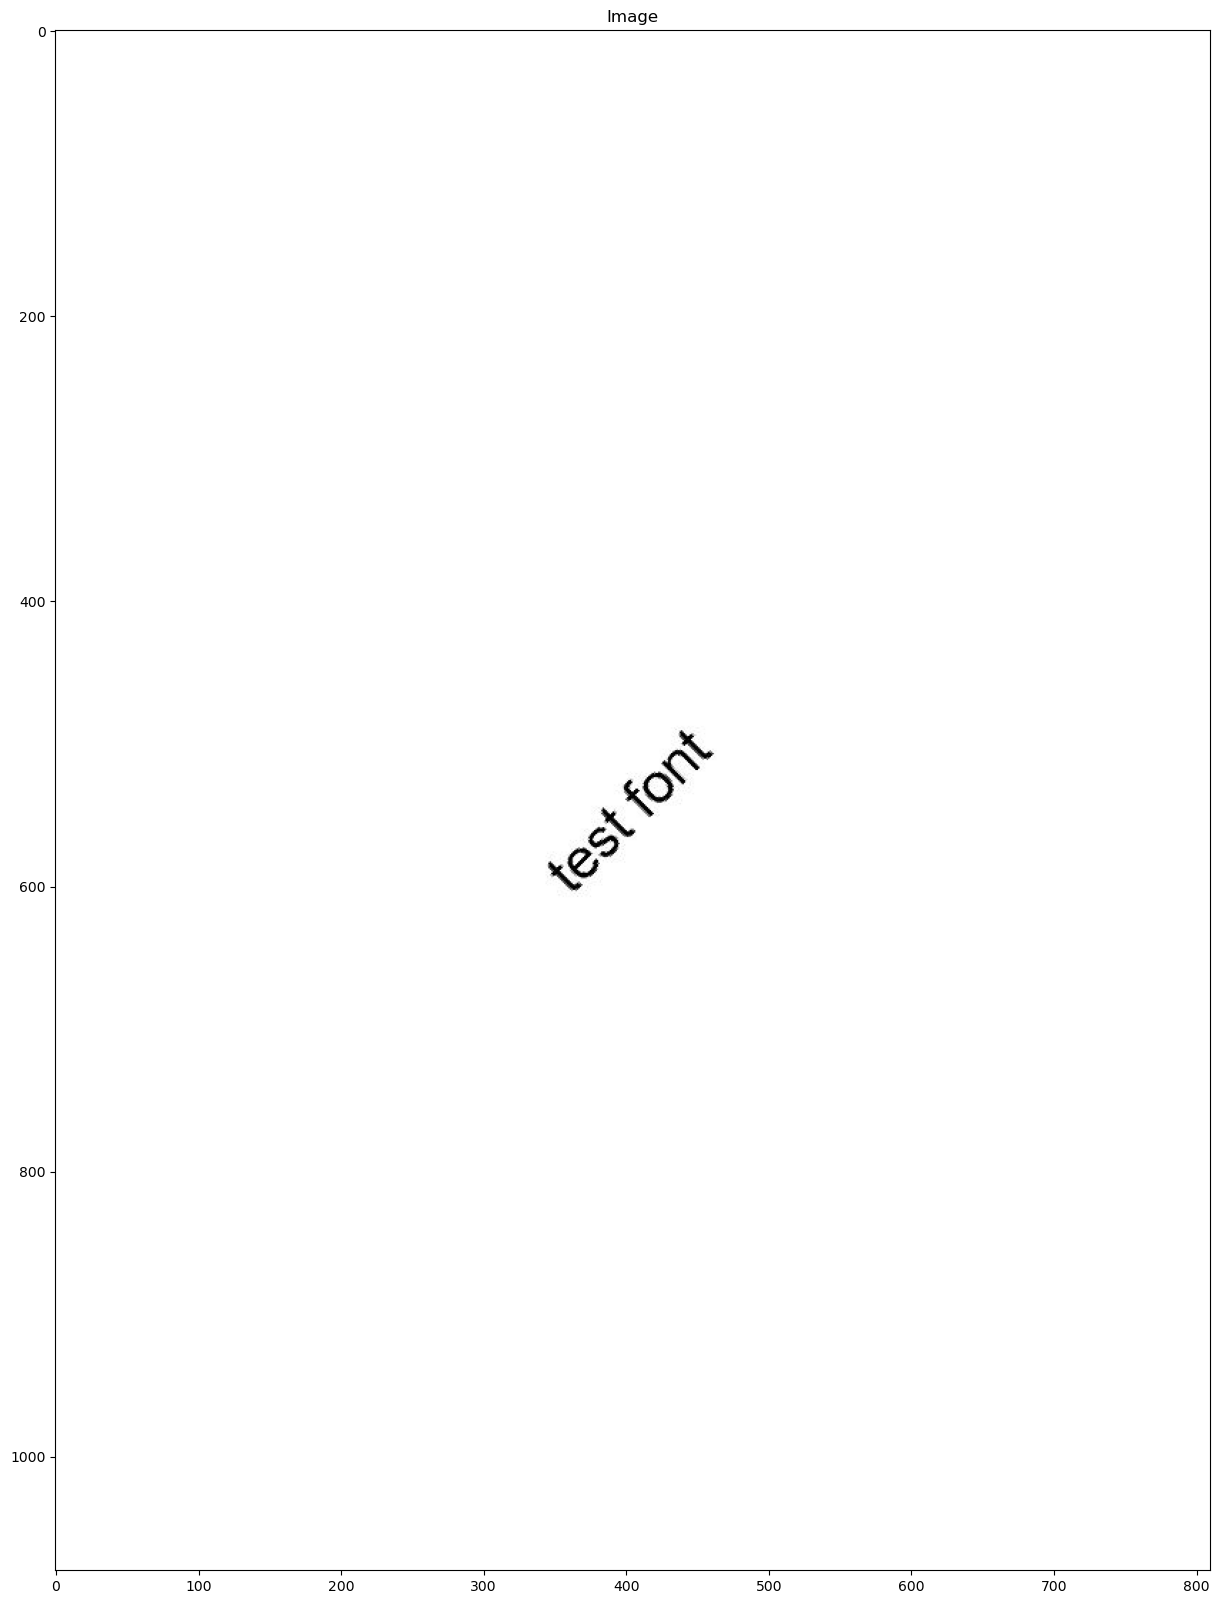

In [7]:
# Đọc ảnh và chuyển sang ảnh xám
image = cv2.imread('new_img.jpg', cv2.IMREAD_GRAYSCALE)
_, binary = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY_INV)
contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
image_color = cv2.imread('new_img.jpg')
ShowOneImage(image_color)

In [8]:
all_contours = np.vstack(contours)

# Bounding box hình chữ nhật nghiêng cho toàn bộ các contours
rect = cv2.minAreaRect(all_contours)
box = cv2.boxPoints(rect)
box = np.int32(box)  # Ép kiểu về số nguyên

# Vẽ khung hình chữ nhật nghiêng lên ảnh
cv2.drawContours(image_color, [box], 0, (0, 255, 0), 2)  # Màu xanh lá cây

# Lưu và hiển thị ảnh kết quả
cv2.imwrite('sample1_bb.png', image_color)

True

In [9]:
print(box[0])
print(box[1])
print(box[2])
print(box[3])
x0, y0 = box [0]
x2, y2 = box [2]
width = box[2] - box[0]
height = box[3] - box[1]
print(x0, y0, x2, y2)
print(width, height)

[342 585]
[441 487]
[461 507]
[362 605]
342 585 461 507
[119 -78] [-79 118]


In [10]:
x0, y0 = box [0]
x1, y1 = box [1]

print(x1-x0)

99


In [21]:
x2, y2 = box [2]
x3, y3 = box [3]

print(x3-x2)

-99
